In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import optimize

In [ ]:
url="https://raw.githubusercontent.com/karansamani/dataset/main/bank%20(1).csv"
df=pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Input variables:
# bank client data:
1 - age (numeric)


2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3 - marital : marital status (categorical: 'divorced','married','single')


4 - education (categorical: 'primary','secondary','tertiary','unknown')


5 - default: has credit in default? (categorical: 'no','yes')


6-Balance: (numeric)

7 - housing: has housing loan? (categorical: 'no','yes')


8 - loan: has personal loan? (categorical: 'no','yes')


# related with the last contact of the current campaign:


9 - contact: contact communication type (categorical: 'cellular','telephone','unknown')


10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


11 - day_of_month: last contact day of the month (numeric)


12 - duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


# other attributes:


13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)


15 - previous: number of contacts performed before this campaign and for this client (numeric, if the value of pdays=-1, then previous=0)


16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success','other', we are converting other to unknown)


Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#Separating categorical and numerical features
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month","poutcome","y"]
var_numerical = ["age", "balance","day_of_the_month","duration", "campaign", "pdays", "previous"]


print(len(var_categorical), len(var_numerical))

10 7


In [ ]:
#checking for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Count of unique values of target variable
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Dataset is imbalanced as shown above

In [ ]:
df['poutcome'].value_counts() 

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [ ]:
df.poutcome = df.poutcome.replace({"other": "unknown"}) #changing the other to unknown
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,unknown,no


In [ ]:
df['poutcome'].value_counts()

unknown    3902
failure     490
success     129
Name: poutcome, dtype: int64

#**Explanatory data analysis**

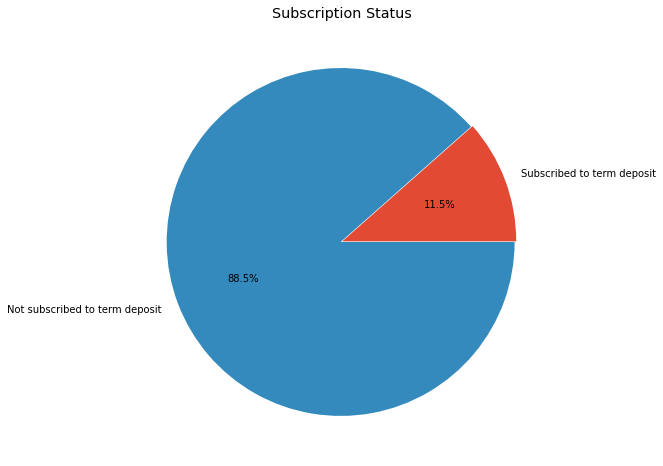

In [ ]:
# Pie-chart to show the percentage of clients subscribed to a term deposit
plt.style.use("ggplot")
plt.figure(figsize=(8, 8))
target_values = [len(df[df['y'] == "yes"]), len(df[df['y'] == "no"])]
labels = ["Subscribed to term deposit", "Not subscribed to term deposit"]
plt.pie(x=target_values, labels=labels, autopct='%1.1f%%',explode=[0,0.01])
plt.title("Subscription Status")
plt.show()

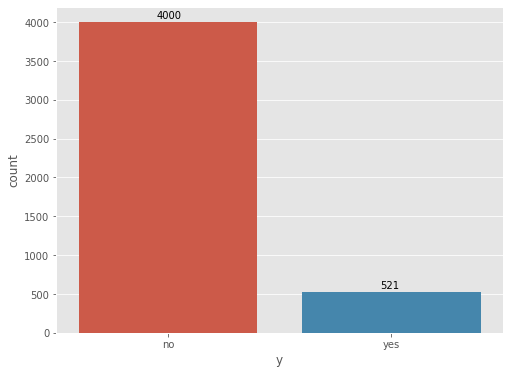

In [ ]:
# Bar graph to show the count of target variable 'y'
plt.figure(figsize=(8,6))

ax = sns.countplot(x = df["y"])  #Imbalanced dataset
# label_values(ax, spacing=-15)


for p in ax.patches: #patches is the area behind each bar
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50)) #second argument is the location of the annotation
plt.show()

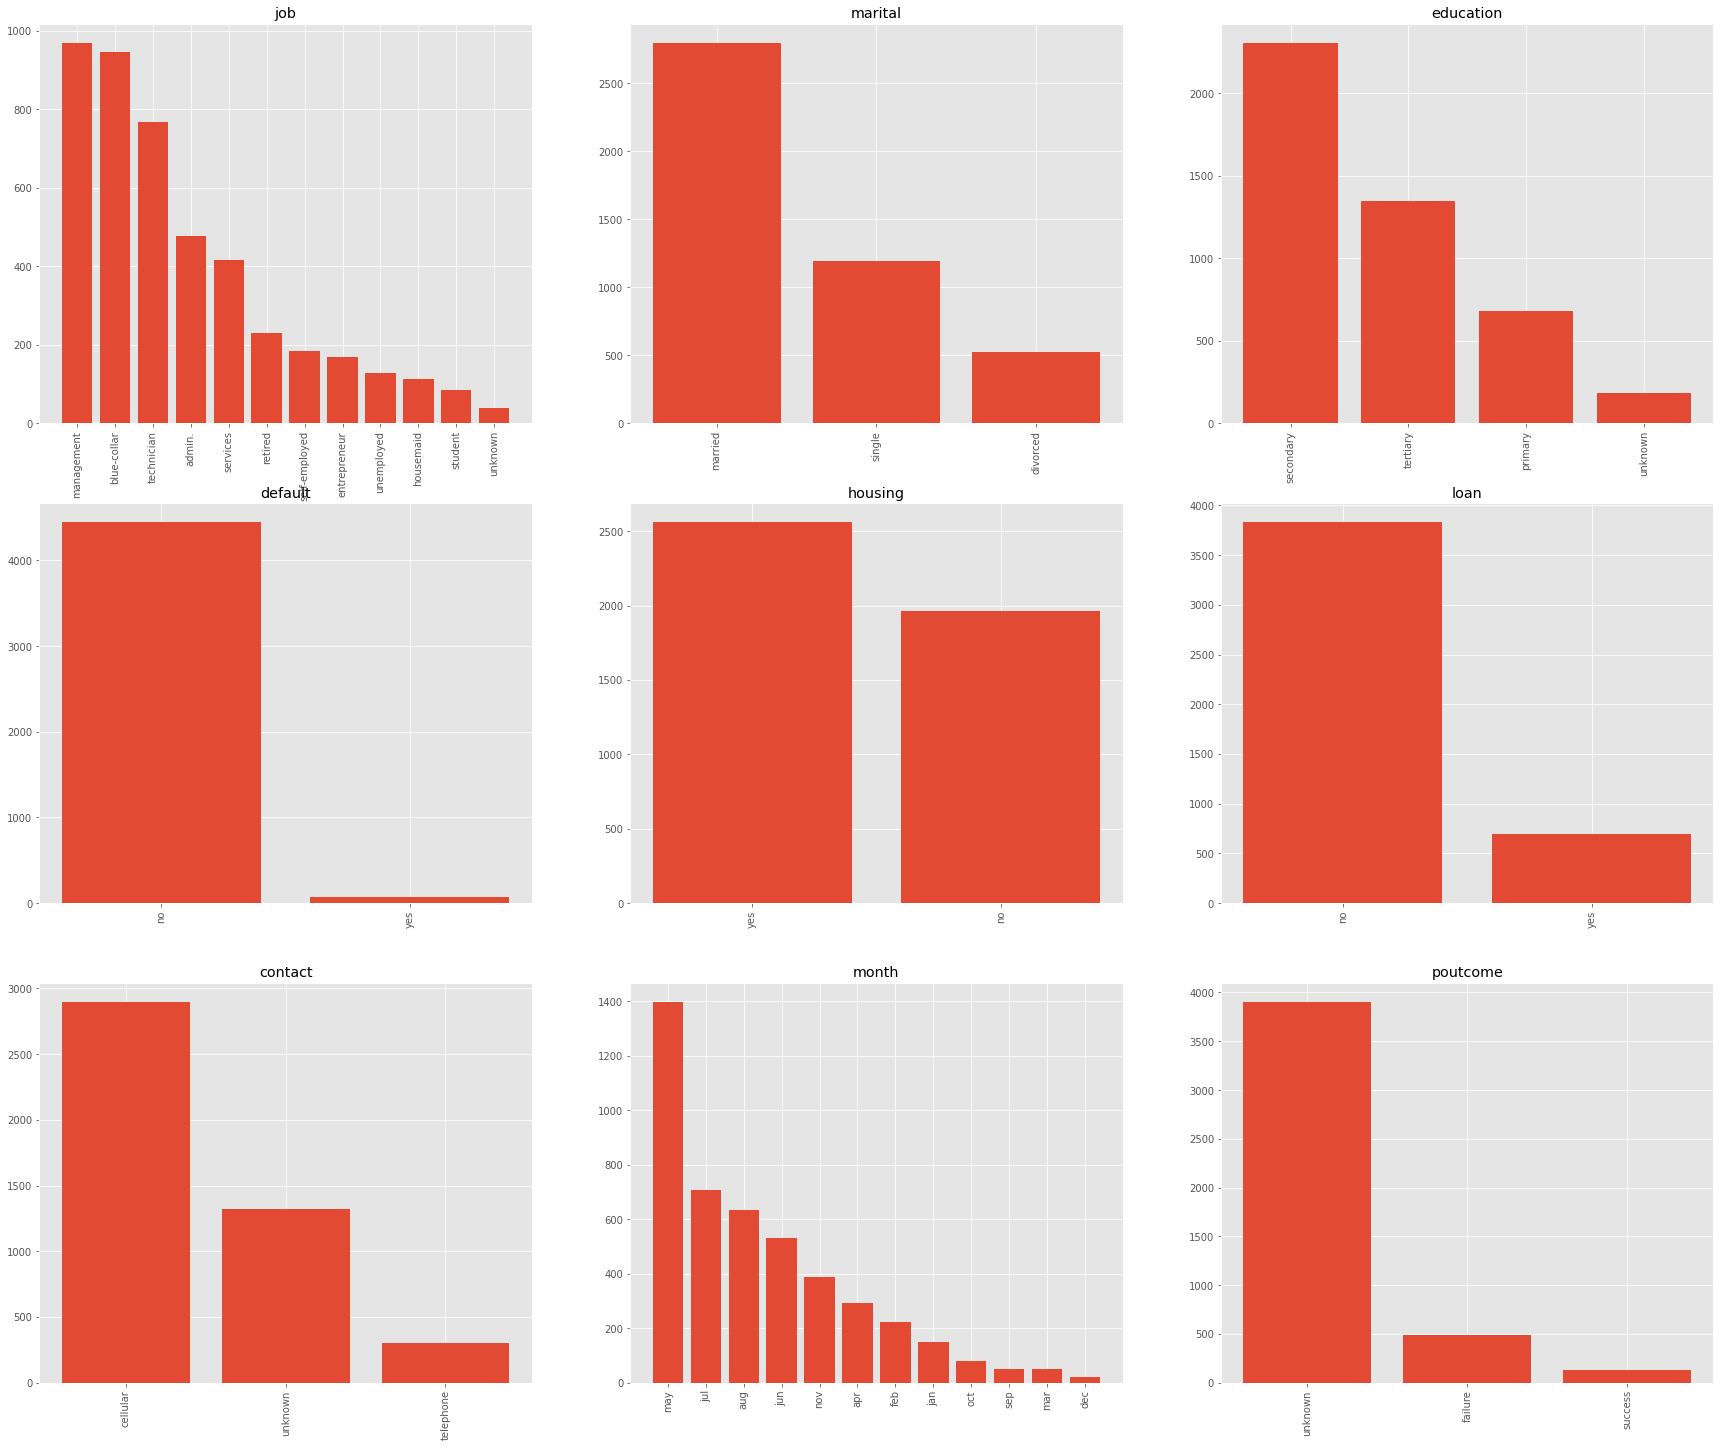

In [ ]:
# Plot count of unique values of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, ax = plt.subplots(3, 3, figsize=(30, 25))

counter = 0
for cat_column in categorical_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3 # used to iterate through each row where plot is shown
    trace_y = counter % 3  # iterate through each col 

    x_pos = np.arange(0, len(value_counts))

    ax[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    ax[trace_x, trace_y].set_title(cat_column)
    
    for tick in ax[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
  
    counter += 1

plt.show()

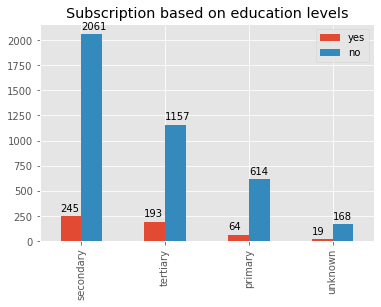

In [ ]:
# Bar graph to plot subscription count based on education levels
new_df = pd.DataFrame()

new_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
new_df['no'] = df[df['y'] == 'no']['education'].value_counts()

ax=new_df.plot.bar(title = 'Subscription based on education levels')

for p in ax.patches: #patches is the area behind each bar
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+50)) #second argument is the location of the annotation
plt.show()

People with secondary and tertiary education are more likely to subscribe to term deposit.

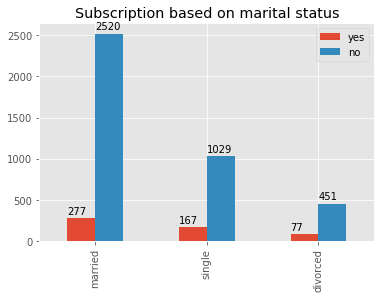

In [ ]:
# Bar graph to plot subscription count based on marital status
new_df = pd.DataFrame()

new_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
new_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

ax=new_df.plot.bar(title = 'Subscription based on marital status')

for p in ax.patches: #patches is the area behind each bar
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+50)) #second argument is the location of the annotation
plt.show()

Married people are more likely to subscribe to term deposit.



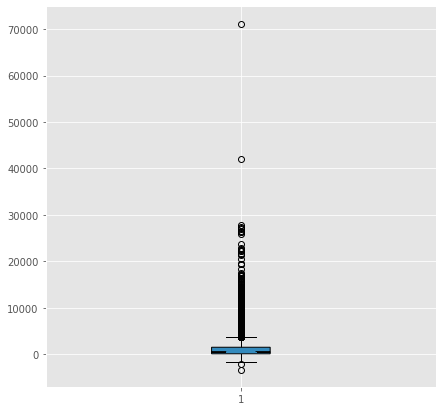

In [ ]:
#Box plot for balance
# plt.boxplot(df['age'], notch=None, vert=None, patch_artist=None, widths=0.5)
fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(df['balance'], patch_artist = True, notch=True)

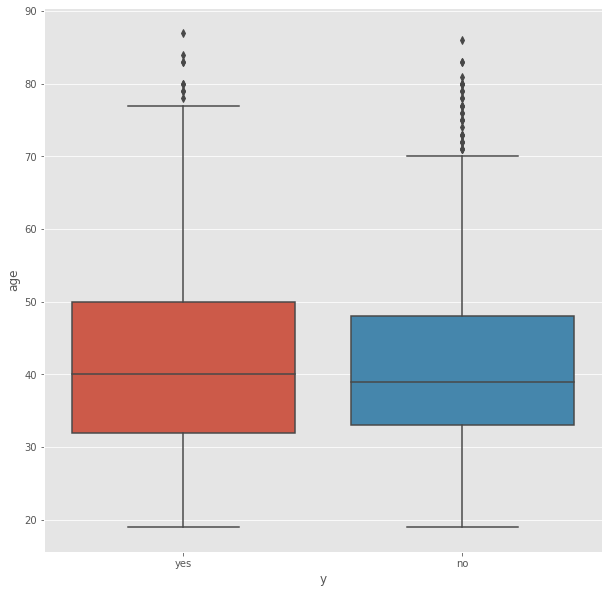

In [ ]:
fig, ax = plt.subplots(figsize =(10, 10))
 
sns.boxplot(data=df, x='y', y='age', order=["yes", "no"])

The age group of people who have/have not subscribed to a term deposit is approximately same.

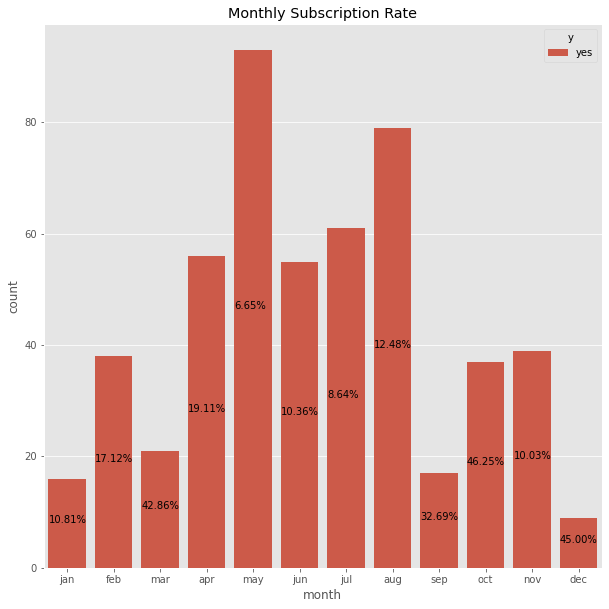

In [ ]:
# Monthly subscription rate barplot
plt.figure(figsize =(10, 10))
ordered_month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ax=sns.countplot(data= df, x='month',hue='y',hue_order=["yes"], order = ordered_month)
plt.title('Monthly Subscription Rate')

total = len(df[df['y']=='yes']) #take all records with subscribed status
rate = []
for i in ordered_month:

 d = df[df['month']== i] 
 rate.append(len(d[d['y']=='yes'])/len(d))

i=0
for p in ax.patches:
    x = p.get_x() 
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:.2f}%'.format(rate[i]*100), (x, y))
    i+=1

plt.show()

October and December months have comparitively higher positive subscription rates over contact made for the respective months, although May has a higher count of positive subscription.

In [ ]:
df_new=df.copy()

In [ ]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,unknown,no


In [ ]:
# Convert 'yes' to 1 and 'no' to 0 in the target variable
pd.options.mode.chained_assignment = None #ignore chained assignment warning

df['y'] = np.where(df.loc[:,'y'] == 'yes', 1, 0)

In [ ]:
# Dataframe of numerical variables excluding days and duration
df_numerical = df[['age','balance','campaign', 'pdays', 'previous','y']]

In [ ]:
df_numerical.head()

,age,balance,campaign,pdays,previous,y
0,30,1787,1,-1,0,0
1,33,4789,1,339,4,0
2,35,1350,1,330,1,0
3,30,1476,4,-1,0,0
4,59,0,1,-1,0,0


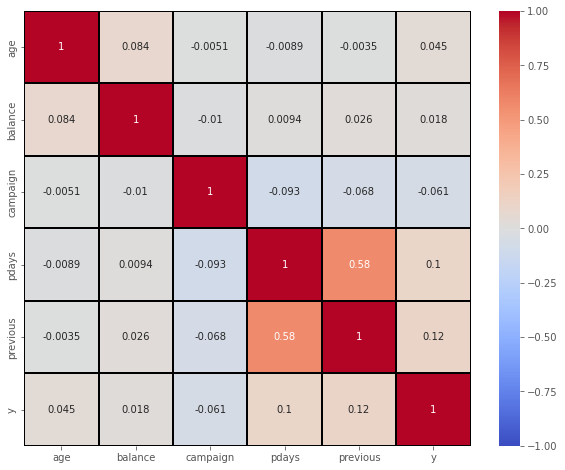

In [ ]:
# Heatmap showing correlation among numerical variables and target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

In [ ]:
df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [ ]:
# One hot encoding 
contact = pd.get_dummies(df.contact, drop_first=False)
poutcome = pd.get_dummies(df.poutcome, drop_first=False)
job = pd.get_dummies(df.job, drop_first=False)
month = pd.get_dummies(df.month, drop_first=False)
marital = pd.get_dummies(df.marital, drop_first=False)
education = pd.get_dummies(df.education, drop_first=False)



In [ ]:
df = pd.concat([df, job, marital, education, contact, month, poutcome], axis=1) #here it is concatenated along the column
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,primary,secondary,tertiary,unknown,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
# REMOVE COLUMNS 'UNKNOWN' AS DROP_FIRST IS TRUE

df.drop(['unknown','duration', 'day'],axis=1,inplace=True)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,1,339,4,failure,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,1,330,1,failure,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,4,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Drop the columns which have dummy values
df_onehotencoded = df.drop(['job', 'marital', 'education', 'contact', 'month','poutcome'], axis = 1)
df_onehotencoded.head()


,age,default,balance,housing,loan,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,30,no,1787,no,no,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33,no,4789,yes,yes,1,339,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,35,no,1350,yes,no,1,330,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,no,1476,yes,yes,4,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,59,no,0,yes,no,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_onehotencoded.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [ ]:
pd.options.mode.chained_assignment = None
df_onehotencoded['default'] = np.where(df_onehotencoded.loc[:,'default'] == 'yes', 1, 0)
df_onehotencoded['housing'] = np.where(df_onehotencoded.loc[:,'housing'] == 'yes', 1, 0)
df_onehotencoded['loan'] = np.where(df_onehotencoded.loc[:,'loan'] == 'yes', 1, 0)
# df_onehotencoded['y'] = np.where(df_onehotencoded.loc[:,'y'] == 'yes', 1, 0)

In [ ]:
df_onehotencoded.head()

,age,default,balance,housing,loan,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,30,0,1787,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33,0,4789,1,1,1,339,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,35,0,1350,1,0,1,330,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,0,1476,1,1,4,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_onehotencoded.shape

(4521, 42)

In [ ]:
df_onehotencoded.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

**SMOTE**

In [ ]:
y = df_onehotencoded[['y']]

X = df_onehotencoded.iloc[:,df_onehotencoded.columns != 'y']

In [ ]:
X

,age,default,balance,housing,loan,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,30,0,1787,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33,0,4789,1,1,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,35,0,1350,1,0,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,0,1476,1,1,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4517,57,1,-3313,1,1,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4518,57,0,295,0,0,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4519,28,0,1137,0,0,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=253) # 90% training and 10% test

**Using smote for balancing the data**

In [ ]:
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique

sampling = SMOTE(random_state=10) #seed used by the random_state generator
X_train1 = np.array(X_train)


smote_sampler = sampling.fit_resample(X_train1,y_train) #fitting the smote, first it downsamples the majority and then it upsamples the minority class 

In [ ]:
smote_sampler #tuple with two elements - an array with oversampled X data and a dataframe with oversampled target variable y

(array([[  23,    0, 8627, ...,    0,    0,    0],
        [  35,    0,  293, ...,    0,    0,    0],
        [  23,    0,  817, ...,    0,    0,    0],
        ...,
        [  35,    0, 5131, ...,    0,    0,    0],
        [  35,    0,   99, ...,    0,    0,    0],
        [  47,    0,  869, ...,    0,    0,    0]]),       y
 0     0
 1     0
 2     0
 3     0
 4     0
 ...  ..
 5613  1
 5614  1
 5615  1
 5616  1
 5617  1
 
 [5618 rows x 1 columns])

In [ ]:
smote_sampler_x = pd.DataFrame(smote_sampler[0]) #CONVERTING TO A DATAFRAME
smote_sampler_y = smote_sampler[1] #already a dataframe

smote_sampler_x.columns=['age',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'divorced',
 'married',
 'single',
 'primary',
 'secondary',
 'tertiary',
 'cellular',
 'telephone',
 'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'failure',
 'success']

smote_sampler_y.columns=['y']
smote_sampler_total = pd.concat([smote_sampler_x,smote_sampler_y],axis=1) #concat both dataframe column wise

In [ ]:
smote_sampler_total

,age,default,balance,housing,loan,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,y
0,23,0,8627,1,0,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,35,0,293,1,0,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23,0,817,1,0,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,55,0,2749,1,1,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,29,0,1,0,0,3,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,45,0,2918,0,0,6,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5614,46,0,2916,0,0,8,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5615,35,0,5131,0,0,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5616,35,0,99,1,0,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Shuffle the records 
from sklearn.utils import shuffle
smote_sampler_total = shuffle(smote_sampler_total)
smote_sampler_total

,age,default,balance,housing,loan,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,y
5062,45,0,57,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
544,39,0,186,1,0,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3279,44,0,786,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1746,45,0,0,1,0,3,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1972,42,0,7702,0,0,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,49,0,1049,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5538,65,0,4191,0,0,1,26,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5595,36,0,14,0,0,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3346,37,0,256,0,0,1,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
smote_sampler_total.y.value_counts() #now both classes are balanced

1    2809
0    2809
Name: y, dtype: int64

In [ ]:
smote_sampler_total

,age,default,balance,housing,loan,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,y
5062,45,0,57,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
544,39,0,186,1,0,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3279,44,0,786,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1746,45,0,0,1,0,3,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1972,42,0,7702,0,0,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,49,0,1049,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5538,65,0,4191,0,0,1,26,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5595,36,0,14,0,0,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3346,37,0,256,0,0,1,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
# X dataset with SMOT applied
X=smote_sampler_total[['age',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'divorced',
 'married',
 'single',
 'primary',
 'secondary',
 'tertiary',
 'cellular',
 'telephone',
 'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'failure',
 'success']]

# Y dataset with SMOT applied
y=smote_sampler_total[['y']]

In [ ]:
# Perform logistic regression with SMOT sampled data 
lr = sklearn.linear_model.LogisticRegression(C=1e5,solver='saga') #c is regularization parameter
lr.fit(smote_sampler_x, smote_sampler_y)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
# Perform GridSearchCV to find best values of C(inverse of regularization strength) for the best penalty norm
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['elasticnet', 'l2'],'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]} #pre defined dictionary for logistic model
grid = GridSearchCV(lr, param_grid = grid_values,scoring = 'recall',cv=7) #lr=model object
grid.fit(smote_sampler_x, smote_sampler_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was pas

GridSearchCV(cv=7, estimator=LogisticRegression(C=100000.0, solver='saga'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['elasticnet', 'l2']},
             scoring='recall')

In [ ]:
grid.best_params_

{'C': 1e-05, 'penalty': 'l2'}

**Lasso (L1) penalty feature selection:**

In [ ]:
# L1 penalty feature selection
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(LogisticRegression(C=1e-05, penalty='l1',solver='liblinear'))
sel.fit(smote_sampler_x, smote_sampler_y)
selected=sel.get_support()
selected

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
for i in range(len(selected)):
    if(selected[i]==True):
       print("selected feature",smote_sampler_x.columns[i])
    else:
      #  print("Feature not selected",df.columns[i])
      pass


**l2 penalty feature selection**

In [ ]:
# L2 penalty feature selection
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(LogisticRegression(C=1e-05, penalty='l2',solver='liblinear'))
sel.fit(smote_sampler_x, smote_sampler_y)
selected=sel.get_support()
selected

In [ ]:
L2_selected_features = []
for i in range(len(selected)):
    if(selected[i]==True):
      print("selected feature",smote_sampler_total.columns[i])
      L2_selected_features.append(smote_sampler_total.columns[i])
    else:
      #  print("Feature not selected",df.columns[i])
      pass

selected feature age
selected feature housing
selected feature loan
selected feature campaign
selected feature pdays
selected feature previous
selected feature blue-collar
selected feature management
selected feature technician
selected feature married
selected feature single
selected feature primary
selected feature secondary
selected feature tertiary
selected feature jul
selected feature may


**Elastic net feature selection:**

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', l1_ratio=0.3)) #l1 ratio to the l2
sel.fit(smote_sampler_x, smote_sampler_y)
selected=sel.get_support()
selected


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
for i in range(len(selected)):
    if(selected[i]==True):
       print("selected feature",smote_sampler_x.columns[i])
    else:
      #  print("Feature not selected",df.columns[i])
      pass

selected feature age
selected feature campaign
selected feature pdays


In [ ]:
# Define train and test samples with the selected features from L2
X_train = smote_sampler_total[L2_selected_features]

y_train = smote_sampler_total['y']

X_test = X_test[L2_selected_features]

y_test = y_test.squeeze() #converting to series from dataframe

## Dummies

In [ ]:
bins= [18,26,41,51,61,71,max(X_train['age'])]
labels = ['18-25','26-40','41-50','51-60','61-70','71-100']
X_train['age'] = pd.cut(X_train['age'], bins=bins, labels=labels)

age = pd.get_dummies(X_train.age, drop_first=True)
X_train = pd.concat([X_train, age], axis=1)
X_train.drop(labels='age', inplace=True, axis=1)
X_train.head()



,housing,loan,campaign,pdays,previous,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100
5062,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
544,1,0,1,-1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3279,0,0,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1746,1,0,3,-1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0
1972,0,0,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test['age'] = pd.cut(X_test['age'], bins=bins, labels=labels)

age = pd.get_dummies(X_test.age, drop_first=True)
X_test = pd.concat([X_test, age], axis=1)
X_test.drop(labels='age', inplace=True, axis=1)
X_test.head()


,housing,loan,campaign,pdays,previous,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100
3124,1,0,2,-1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
3896,0,0,1,311,4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4292,1,0,4,-1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1302,1,0,1,-1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
955,1,0,3,-1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
bins_= [-2,0,150,300,450,600]
labels_ = ['No previous contact','0-149days','150-299days','300-449days','450-599days']
X_train['pdays'] = pd.cut(X_train['pdays'], bins=bins_ , labels=labels_, )

pdays = pd.get_dummies(X_train.pdays, drop_first=False)
X_train = pd.concat([X_train, pdays], axis=1)
X_train.drop(labels=['pdays','450-599days'], inplace=True, axis=1)
X_train.head()

,housing,loan,campaign,previous,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100,No previous contact,0-149days,150-299days,300-449days
5062,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
544,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3279,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1746,1,0,3,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
1972,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
X_test['pdays'] = pd.cut(X_test['pdays'], bins=bins_ , labels=labels_, )

pdays = pd.get_dummies(X_test.pdays, drop_first=False)
X_test = pd.concat([X_test, pdays], axis=1)
X_test.drop(labels=['pdays','450-599days'], inplace=True, axis=1)
X_test.head()

,housing,loan,campaign,previous,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100,No previous contact,0-149days,150-299days,300-449days
3124,1,0,2,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
3896,0,0,1,4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4292,1,0,4,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1302,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
955,1,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
bins_= [0,10,20,30,max(X_train['campaign'])]
labels_ = ['1-9Currentcontact','10-19CurrentContact','20-29CurrentContact','>30CurrentContact']
X_train['campaign'] = pd.cut(X_train['campaign'], bins=bins_ , labels=labels_, )

campaign = pd.get_dummies(X_train.campaign, drop_first=False)
X_train = pd.concat([X_train, campaign], axis=1)
X_train.drop(labels=['campaign','>30CurrentContact'], inplace=True, axis=1)
X_train.head()

,housing,loan,previous,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100,No previous contact,0-149days,150-299days,300-449days,1-9Currentcontact,10-19CurrentContact,20-29CurrentContact
5062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
544,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3279,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1746,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1972,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
X_test['campaign'] = pd.cut(X_test['campaign'], bins=bins_ , labels=labels_, )

campaign = pd.get_dummies(X_test.campaign, drop_first=False)
X_test = pd.concat([X_test, campaign], axis=1)
X_test.drop(labels=['campaign','>30CurrentContact'], inplace=True, axis=1)
X_test.head()

,housing,loan,previous,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100,No previous contact,0-149days,150-299days,300-449days,1-9Currentcontact,10-19CurrentContact,20-29CurrentContact
3124,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3896,0,0,4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4292,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1302,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
955,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
bins_= [-1,10,20,30]
labels_ = ['<10 PreviousContact','10-19PreviousContact', '>20PreviousContact']
X_train['previous'] = pd.cut(X_train['previous'], bins=bins_ , labels=labels_, )

previous = pd.get_dummies(X_train.previous, drop_first=False)
X_train = pd.concat([X_train, previous], axis=1)
X_train.drop(labels=['previous'], inplace=True, axis=1)
X_train.head()

,housing,loan,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100,No previous contact,0-149days,150-299days,300-449days,1-9Currentcontact,10-19CurrentContact,20-29CurrentContact,<10 PreviousContact,10-19PreviousContact,>20PreviousContact
5062,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
544,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3279,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1746,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1972,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
X_test['previous'] = pd.cut(X_test['previous'], bins=bins_ , labels=labels_, )

previous = pd.get_dummies(X_test.previous, drop_first=False)
X_test = pd.concat([X_test, previous], axis=1)
X_test.drop(labels=['previous'], inplace=True, axis=1)
X_test.head()

,housing,loan,blue-collar,management,technician,married,single,primary,secondary,tertiary,jul,may,26-40,41-50,51-60,61-70,71-100,No previous contact,0-149days,150-299days,300-449days,1-9Currentcontact,10-19CurrentContact,20-29CurrentContact,<10 PreviousContact,10-19PreviousContact,>20PreviousContact
3124,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3896,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4292,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1302,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
955,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
class LogisticRegression:
    def __init__(self,learningRate,tolerance, maxIteration):
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        
   
    def add_x0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]), X]) #add 1s - count=number of rows-X.shape[0], column 1, dataframe X
    
    def normalize(self,X):
       
        mean = np.mean(X,0) #0 means columnwise mean, 1-> row-wise calculation
        std = np.std(X,0)
        
        X_norm=(X-mean)/std
        #first normalize data, then add column with 1s
        X_norm = self.add_x0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X,train_mean, train_std):
        X_norm = (X - train_mean)/train_std
        X_norm = self.add_x0(X_norm)
        
        return X_norm
    
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig
    
    #Cost function
    def costFunction(self,X,y):
        pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y) # negative log likelihood #log(ones) -to the whole dataframe 
        cost = pred_.sum()
        return cost
    
    def gradient(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        
        return grad #number of grad = no. of features, so we do not sum them up
    
    def gradientDescent(self,X,y): 
        cost_sequences=[]
        last_cost= float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate *self.gradient(X,y)
            
            cur_cost = self.costFunction(X,y) #how does currrent cost reduce in each iteration
            diff = last_cost-cur_cost
            last_cost=cur_cost
            cost_sequences.append(cur_cost)
            
            if diff < self.tolerance:
                print("The model stopped - converged")
                break
            
        self.plotCost(cost_sequences) 
            
    def plotCost(self,error_sequences):
        s=np.array(error_sequences)
        t=np.arange(s.size)
        
        fig, ax=plt.subplots()
        ax.plot(t,s)
        ax.set(xlabel = "No. of iterations",
              ylabel = "Error value")
        plt.show()
              
            
    def predict(self,X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
        
    def evaluate(self,y,y_hat):
        y=(y==1)
        y_hat=(y_hat==1)
        accuracy=(y==y_hat).sum() / y.size #accuracy by summing up all occurances of class 1 - class of interest
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy,precision,recall
    
    def runModel(self):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        self.X_train, self.mean, self.std = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean,self.std)

        print("Solving using gradient descent")
        
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64)*0 #check with diff w values
        self.gradientDescent(self.X_train,self.y_train)
        
        print(self.w)

        y_hat_train = self.predict(self.X_train)
        accuracy,precision, recall = self.evaluate(self.y_train, y_hat_train)
        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)
        print("Precision",precision)
        print("Recall",recall)

        print("---------------------------------")

        y_hat_test = self.predict(self.X_test)
        accuracy,precision, recall = self.evaluate(self.y_test, y_hat_test)
        
        print("Evaluation for testing data: \n")
        print("Accuracy", accuracy)
        print("Precision",precision)
        print("Recall",recall)        
     
        
          

In [ ]:
lr= LogisticRegression(tolerance=0,learningRate=0.0001,maxIteration=10000)

Solving using gradient descent


 84%|████████▍ | 8427/10000 [00:14<00:02, 570.34it/s]


The model stopped - converged


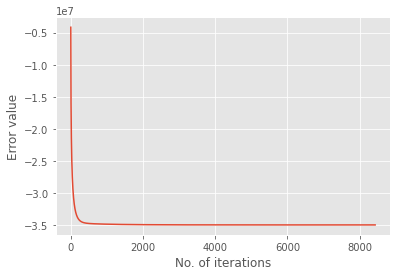

[ 0.15788024 -0.38793713 -0.39160587 -0.39225561 -0.31852178 -0.44580109
 -0.92324759 -0.72577494 -0.86819393 -1.18613547 -1.03956022 -0.33445707
 -0.6507193  -0.07534489 -0.16347291 -0.37850301 -0.08608815 -0.07659544
 -1.03533984 -0.31966992 -0.42632118 -0.27565155  0.34794373  0.09895145
 -0.28776841  0.07221116  0.0104909  -0.16759224]
Evaluation for training data: 

Accuracy 0.8556425774296903
Precision 0.8672794117647059
Recall 0.8398006407974368
---------------------------------
Evaluation for testing data: 

Accuracy 0.7914517317612381
Precision 0.22790697674418606
Recall 0.29518072289156627


In [ ]:
lr.runModel()

Solving using gradient descent


  0%|          | 1/10000 [00:00<01:46, 94.18it/s]

The model stopped - converged


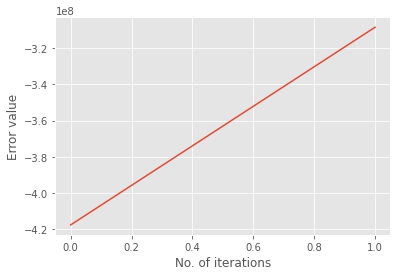

[-0.90569896 -4.72726843 -5.44967863 -4.71100482 -4.95396037 -4.90132211
 -9.18347906 -5.6582278  -5.81087244 -7.2930923  -6.2489144  -3.13247662
 -6.94550878  1.67687509  0.22559548 -2.07287562  0.21869522 -1.27152819
 -4.8607905   4.80694511  0.17093159  1.46436873  2.89990787 -2.51649829
 -1.25771502  0.95119846 -0.68452175 -0.72562454]
Evaluation for training data: 

Accuracy 0.8479886080455679
Precision 0.8605680560678717
Recall 0.8305446778212887
---------------------------------
Evaluation for testing data: 

Accuracy 0.8010316875460575
Precision 0.25925925925925924
Recall 0.3373493975903614


In [ ]:
lr= LogisticRegression(tolerance=0,learningRate=0.01,maxIteration=10000)
lr.runModel()

Solving using gradient descent


  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
100%|██████████| 10000/10000 [00:17<00:00, 577.63it/s]


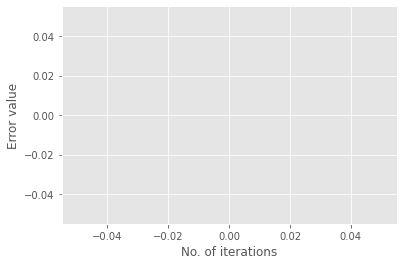

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


[ -725.95454907  -693.52736957  -326.3350724   -969.05082324
    99.77173138  -333.88368565 -1203.85488849    17.56194719
  -770.61283089 -1171.55282085    31.15779813  -273.51795725
  -651.95052907   262.85226699  -350.61952912  -410.05754218
   -20.80128396   -40.31273613 -1019.28653196   103.01760701
  -348.80396778  -414.3641274     39.91342203    93.23181312
  -204.67617571    52.5122992     12.46347126  -130.58228835]
Evaluation for training data: 

Accuracy 0.7550729797080812
Precision 0.7826429980276134
Recall 0.7063011747953009
---------------------------------
Evaluation for testing data: 

Accuracy 0.7553426676492262
Precision 0.20567375886524822
Recall 0.3493975903614458


In [ ]:
lr= LogisticRegression(tolerance=0,learningRate=1,maxIteration=10000)
lr.runModel()

## SVM


In [ ]:
class SoftMarginSVM_kernel:
    
    
    """Class that performs Soft margin SVM:
    ---------------
    Parameters:
    X-features
    y-target variable
    alpha-lagrangian multiplier
    w-weights(parameters which are learnt)
    C-regularization term
    
    """
    def __init__(self,X,y,C):
        self.alpha = None
        self.w = None
        self.supportVectors = None
        self.X=X
        self.y=y
        self.C = C
    def kernel_helper(self, xa, xb):
        
        '''function to calculate the RBF kernel'''
        p=(xa-xb)
        pa=p.T.dot(p)
        return int(pa)
        
    def Kernel(self,X):
        
        '''function to calculate the RBF kernel'''
        oper=0
        std=0.1
        for i in range(len(X)):
            for j in range(len(X)):
                xi=X[i]
                xj=X[j]
                oper+=self.kernel_helper(xi,xj)
        oper=oper/2*std*std
        return np.exp(-oper)
    
    def normalize(self,X):
        
        '''function to scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the train data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''function to add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
                

    def fit(self, X, y):
        
        '''function to fit the model'''

        N = len(y)

        # Gram matrix of (X,y)
        Xy = X*y[:,np.newaxis] 

        GramXy = y.T.dot(y)
        GramXy = (GramXy*self.Kernel(X))
    
        def Ld0(G, alpha):
            
            '''function to calculate the dual form of SVM'''
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))

            return obj_fn
        

            # Derivative of Lagrangian Function
        def partialDerivationLd0(G, alpha):
            
            '''function to calculate derivative of lagrangian function'''
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der

        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y },
                    {'type': 'ineq', 'fun':lambda a: b - np.dot(A, a), 'jac': lambda a: -A}) 

        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                x0 = alpha,
                                method = 'SLSQP',
                                jac = lambda a: - partialDerivationLd0(GramXy, a),
                                constraints = constraints)
        
        self.alpha = optRes.x


        self.w =  np.sum(( self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4
        self.supportVectors = X[ self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]


        self.b1 = self.supportLabels[0] - np.matmul(self.supportVectors[0].T, self.w)
        
        b = []
        for i in tqdm(range(len(self.supportLabels))):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append( b_i )
        
        self.b2 = sum(b)/len(b)
        
        self.intercept = self.b2
        
    def predict(self, X):
        
        '''function to return the predicted classes'''
    
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1
    
    def evaluate(self,y,y_hat):
        
        '''function to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''
        
        
        #solving class imbalance using SMOTE
        
        smote=SMOTETomek(random_state=42)
        self.X,self.y= smote.fit_resample(self.X,self.y)
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.fit(self.X_train,self.y_train)
        
        y_hat_train = self.predict(self.X_train)
        print('This is y_hat_train:', y_hat_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        print('This is y_hat_test:', y_hat_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)

In [ ]:
model1 = SoftMarginSVM_kernel(X.values[:, :], y.values[:],C=1)
model1.runModel()

## Neural Network

In [ ]:
pip install scikeras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scikeras
from scikeras import wrappers

In [ ]:
Xnn = pd.concat([X_train, X_test], axis=0)
ynn = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)], axis=0)

In [ ]:
Xnn = Xnn.astype(float)
ynn = ynn

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(ynn)
encoded_Y = encoder.transform(ynn)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# baseline model - # With 1 hidden layer, n_splits =10
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(27, input_dim=27, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# evaluate model with standardized dataset
estimator = scikeras.wrappers.KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True) # 10 fold cross validation
results = cross_val_score(estimator, Xnn, ynn, cv=kfold, error_score='raise')
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

Baseline: 85.86% (1.16%)


In [ ]:
# With 1 hidden layer, n_splits =5
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(27, input_dim=27, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = scikeras.wrappers.KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, Xnn, ynn, cv=kfold, error_score='raise')
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

Baseline: 85.36% (1.23%)


In [ ]:
# With 2 hidden layers, n_splits =10 - no significant change in accuracy observed
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(27, input_dim=27, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = scikeras.wrappers.KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, Xnn, ynn, cv=kfold, error_score='raise')
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

Baseline: 85.32% (1.27%)


In [ ]:
train_cnn = pd.concat([X_train, y_train], axis=1)
test_cnn = pd.concat([X_test, y_test], axis=1)

data = pd.concat([train_cnn, test_cnn], axis=0)

In [ ]:
data.shape

(6975, 28)

In [ ]:
X = data.iloc[:,0:27]
y = data.iloc[:,27]

In [ ]:
# X=features

# y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(5580, 27)

In [ ]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(27,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=1)

Epoch 1/8
5580/5580 [==============================] - 7s 1ms/step - loss: 0.3948 - accuracy: 0.8353
Epoch 2/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3455 - accuracy: 0.8570
Epoch 3/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3406 - accuracy: 0.8579
Epoch 4/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3338 - accuracy: 0.8613
Epoch 5/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3312 - accuracy: 0.8654
Epoch 6/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3286 - accuracy: 0.8624
Epoch 7/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3234 - accuracy: 0.8668
Epoch 8/8
5580/5580 [==============================] - 6s 1ms/step - loss: 0.3239 - accuracy: 0.8656


In [ ]:
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)

print(score)

44/44 [==============================] - 0s 885us/step - loss: 0.3824 - accuracy: 0.8387
[0.3824082314968109, 0.8387096524238586]
